In [1]:
from results_data import ResultsCELI
from results_data import open_pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
globalfont = 'DejaVu Sans'

In [2]:
matplotlib.font_manager.findfont('Cambria')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


'/home/jfaulkner31/mambaforge3/envs/openmc-env/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [3]:
out = open_pkl(filename='../RESULTS/tempDepndFHR_ex5_upTo_stepNum_14.pkl')

In [4]:
# available functions:
# out.print_case_settings()
# out.get_BOS_keffs()
# out.get_BOS_isotope()
# out.get_BOS_power()
# out.get_corrector_keffs()
# out.get_BOS_AO
# need to make:
# out.get_corrector_power()
# out.get_corrector_isotope()

In [5]:
out.print_case_settings()

fissionable_mats: [161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176]
fissionable_mats_vols: [457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273, 457.33869041273]
residual_number_density: 1e-20
include_non_fission_material_power: True
print_transport_powers: True
system_IHM_mass_grams: 72137.0
specific_power: [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
steplength_days: [0.5, 2, 2.5, 5, 10, 10, 10, 10, 20, 20, 20, 20, 20, 50, 50, 50, 50]
origen_predictor_divs: 2
addnuxdictbase: addnuxDicts/addnux3Dict.dict
base_triton: triton_base.inp
origen_base: baseOrigenFile.inp
origenResults_F71dir: OrigenResults_F71dir
MonteCarloResults_F33dir: MonteCarloResults_F33
Nprocs: 191
machinefile: nodes.78514
tmpdir: tmp
is_parallel: T

In [6]:
BOS_keffs, BOS_sigmas, bu, time = out.get_BOS_keffs()

In [7]:
u5, bu, time = out.get_BOS_isotope(material_id=161, isotope='U-235')

In [8]:
out.get_corrector_keffs(step_num=7)

(array([1.26231, 1.26176, 1.26211, 1.26187]),
 array([0.00022, 0.00019, 0.00021, 0.00019]))

In [9]:
out.print_methods()

available methods for postprocessing results:
out.print_case_settings()
out.get_BOS_keffs()
out.get_BOS_isotope()
out.get_BOS_power()
out.get_corrector_keffs()
out.get_BOS_AO

Plotting:
out.plot_BOS_power_map
out.plot_BOS_power_2d
out.plot_all_power_map
out.plot_BOS_isotopics_map



Need to make the following still
out.get_corrector_power()
out.get_corrector_isotope()
out.get_corrector_AO()


In [10]:
_, _, p = out.get_BOS_power()
p[0].values()

dict_values([0.032600163000815, 0.04325521627608138, 0.05434027170135851, 0.06352531762658814, 0.07064035320176601, 0.07614538072690363, 0.07962539812699064, 0.08100040500202502, 0.08061040305201526, 0.07871039355196777, 0.07529537647688238, 0.07017535087675439, 0.06280031400157, 0.05352026760133801, 0.04219521097605488, 0.03158015790078951])

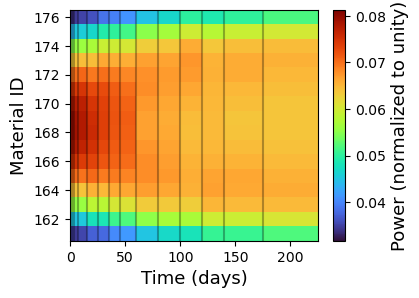

In [11]:
parr, BOS_time = out.plot_BOS_power_map(normalize=True, figsize=(4,3), cmap='turbo', fontname=globalfont,fontsize=13)

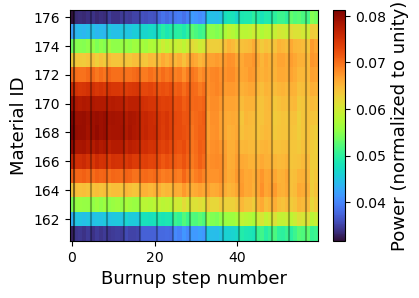

In [12]:
parr = out.plot_all_power_map(normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

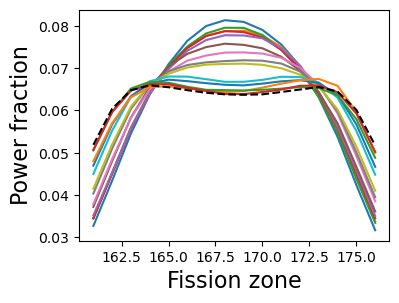

In [13]:
parr, BOS_time = out.plot_BOS_power_2d(normalize=True, figsize=(4,3), fontname=globalfont,fontsize=16)

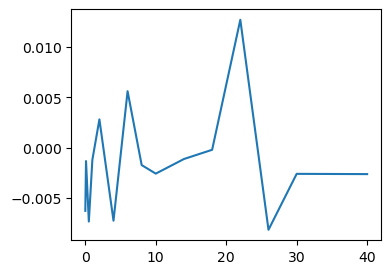

In [14]:
t, b, ao = out.get_BOS_AO()
figAO, axAO = plt.subplots(figsize=(4,3))
axAO.plot(t,ao)

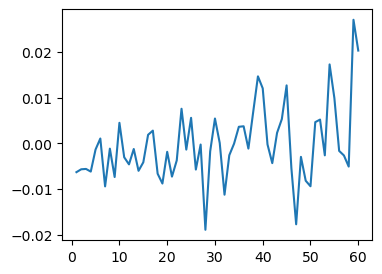

In [15]:
x, ao = out.get_all_AO()
figAO, axAO = plt.subplots(figsize=(4,3))
axAO.plot(x,ao)

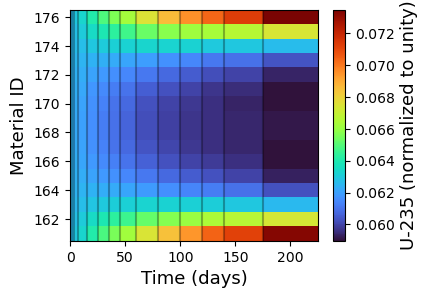

In [16]:
u235arr = out.plot_BOS_isotopics_map(isotope='U-235',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

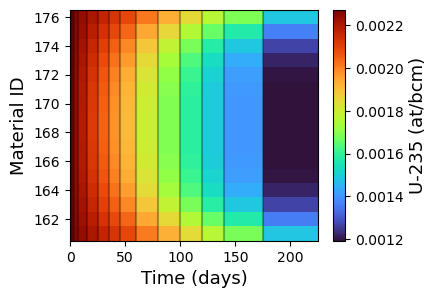

In [17]:
u235arr = out.plot_BOS_isotopics_map(isotope='U-235',
                       normalize=False, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

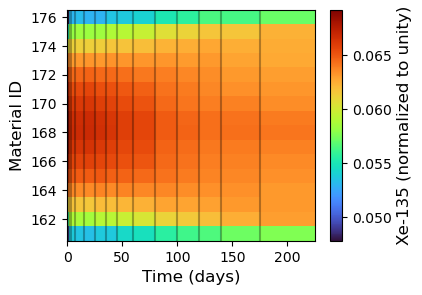

In [18]:
xe135arr = out.plot_BOS_isotopics_map(isotope='Xe-135',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=12, fontname=globalfont)

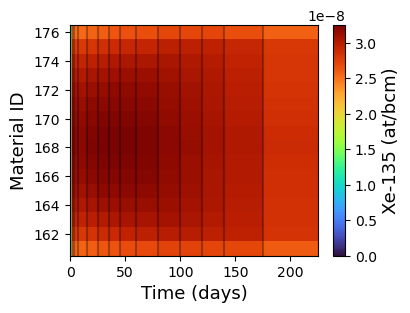

In [19]:
xe135arr = out.plot_BOS_isotopics_map(isotope='Xe-135',
                       normalize=False, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

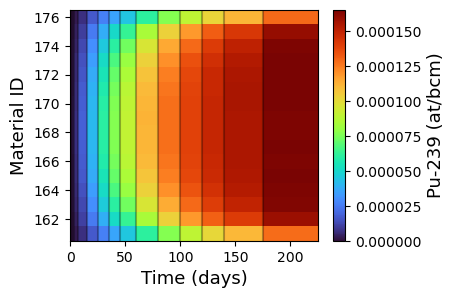

In [20]:
pu239arr = out.plot_BOS_isotopics_map(isotope='Pu-239',
                       normalize=False, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

In [21]:
# plotting isotopics at end of every substep --->
# not working now but save for later when we make plot_all_isotopics_map

iso = 'U-235'

fissile_materials = out.BOS_power[0].keys()
for bigStep in out.isotopics_all.keys():
  for substep in out.isotopics_all[bigStep].keys():
    atom_dens_row = np.array([])
    for mat in fissile_materials:
      atom_dens_row = np.append(atom_dens_row, out.isotopics_all[bigStep][substep].material_dict[mat].return_iso_atom_dens(iso))



KeyError: 161